# Stack Overflow Developer Survey 2017

## Developers Vs Non-Developer Respondents 

##### By SWATI CHANCHAL 

## Business Understanding :
In this project I have used the dataset from Stack Overflow survey data 2017.

>Project goal is to find out:
- Which Proffesion has more Career Satisfaction andJob Satisfaction ?
- Which Profession is more Job Secured ?
- What's the Employment Status for both the Profession ?
- What is the impact of Location on both the Profession ?
- What is the salary difference between both the Profession ?

## Data Understanding :

### Importing necessary libraries 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing data set 

In [21]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(51392, 154)

In [91]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


- The shape of our dataset is 51392 , 154 .

### Wrangling the Data :
- select useful data (columns)
- deal with the missing value 
- merge the DeveloperType and NonDeveloperType Column 

### Copying the original dataset for further implementation .

In [24]:
df2 = df.copy()

In [25]:
# Replacing all the None or Null values .

df2.NonDeveloperType.replace('None', '', inplace=True) 
df2.NonDeveloperType.replace(np.NaN, '', inplace=True)
df2.DeveloperType.replace('None', '', inplace=True) 
df2.DeveloperType.replace(np.NaN, '', inplace=True)

In [26]:
# joining the DeveloperType and NonDeveloperType Column .

df2['dtype'] = df2.NonDeveloperType + df2.DeveloperType

In [27]:
df2['dtype'].nunique()

1957

In [22]:
developer = list(df['DeveloperType'].unique())
non_developer = list(df['NonDeveloperType'].unique())

In [29]:
data = df.copy()

In [30]:
# Creating a Column for specifying the profession , i.e Developer and Non-Developer 

data['Profession'] = df2['dtype'].apply(lambda x: 'ND' if x in non_developer else ('D' if x in developer else 'Others') )
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Profession
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,Others
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,Others
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,ND
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,ND
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [31]:
data['Profession'].value_counts()

D         34669
Others    10381
ND         6342
Name: Profession, dtype: int64

- the wrangling part is over . 
- Now analysing the data for our questions mentioned .

## Data Analysis :

In [102]:
def labels_name(x , y = None):
    '''This function is for just avoid writting the lablels and title over and over again .
    Input :
    1. x : X Axis Information
    2. y : Y Axis Information 
    
    Output :
    it will add the label and title on your plot .
    '''
    
    plt.xlabel(x)
    plt.ylabel(y)
    if(y == None):
        plt.title(x , 'Distribution');
    else:
        plt.title(f' {x} and {y} Distribution')

- **Selecting only some necessary columns for further analysis .**

In [42]:
columns = ['Country' , 'EmploymentStatus'  , 'CareerSatisfaction' , 'JobSatisfaction' ,
          'JobSecurity' , 'HoursPerWeek' , 'Gender' , 'Salary' , 'Profession']

survey = data[data['CareerSatisfaction'].notnull()]    # removing rows with NULL CareerSatisfaction value .
survey = survey[columns]

In [43]:
survey.head()

,Country,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSecurity,HoursPerWeek,Gender,Salary,Profession
2,United Kingdom,Employed full-time,8.0,9.0,Agree,NaN,Male,113750.0,ND
3,United States,Employed full-time,6.0,3.0,Somewhat agree,5.0,Male,NaN,ND
4,Switzerland,Employed full-time,6.0,8.0,NaN,NaN,NaN,NaN,D
6,United States,Employed full-time,7.0,6.0,NaN,1.0,Male,NaN,ND
7,Poland,Employed full-time,7.0,7.0,NaN,1.0,Male,NaN,D


In [44]:
survey.shape

(42695, 9)

In [48]:
survey1 = survey.copy()   # creating a copy for visualization 

## Data Visualization 

# Q.1 ) Which Profession has more Career Satisfaction and Job Satisfaction ?

In [54]:
base_color = sns.color_palette()[0]

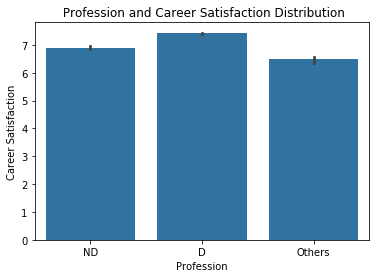

In [96]:
sns.barplot(data = survey1, y = 'CareerSatisfaction', x = 'Profession',color = base_color );
labels_name('Profession' ,'Career Satisfaction')

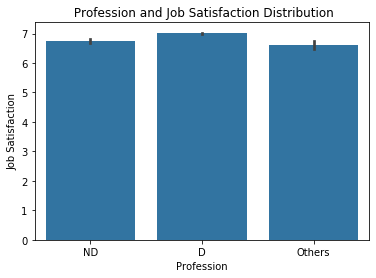

In [97]:
sns.barplot(data = survey1, y = 'JobSatisfaction', x = 'Profession',color = base_color );
labels_name('Profession' ,'Job Satisfaction')

## Observation :
- Developers are more Satisfied in terms of career and job .

# Q.2 ) Which Profession is more Job Secured ?

For secured job we'll check to the JobSecurity and HoursPerWeek column .

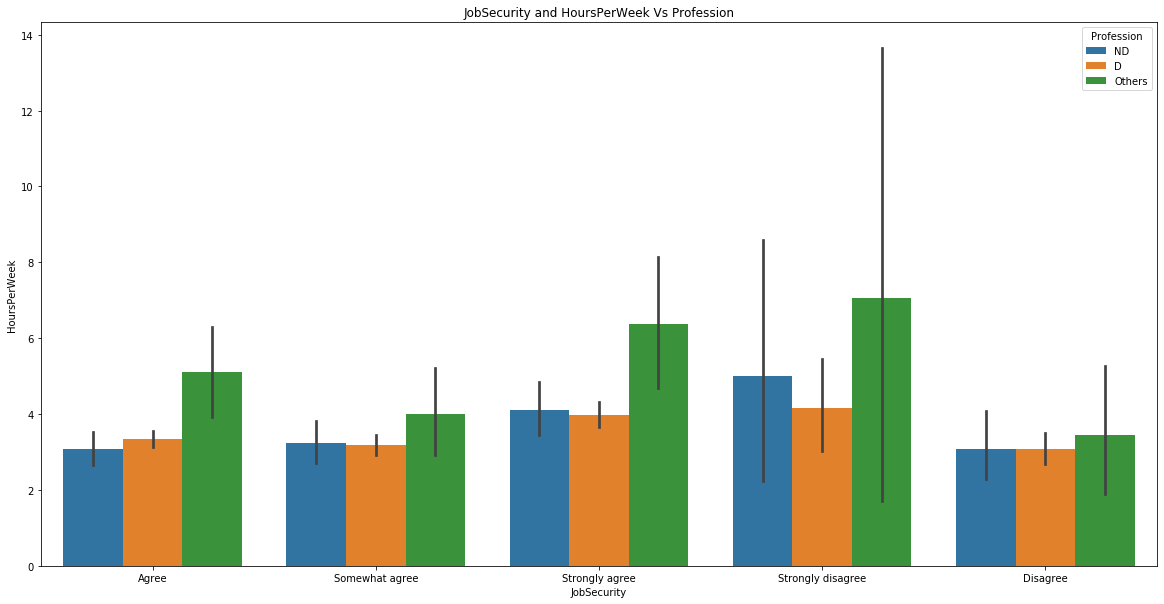

In [99]:
plt.figure(figsize = [20,10])
sns.barplot(data = survey1, x = 'JobSecurity', 
            y = 'HoursPerWeek', hue = "Profession");
labels_name('JobSecurity' ,'HoursPerWeek')
plt.title('JobSecurity and HoursPerWeek Vs Profession');

## Observation :
- Non Developers strongly disagree to job security .
- Developers are the one who spend less hours searching for job and having more secured job than Non developers .

# Q.3 ) What's the Employment Status for both the Profession ?

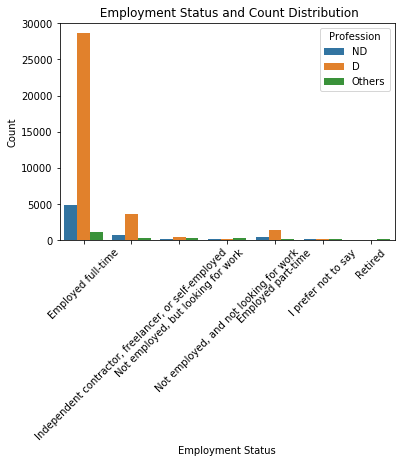

In [105]:
ax = sns.countplot(data = survey1, x = 'EmploymentStatus' , hue = 'Profession');
plt.xticks(rotation = 45);
labels_name('Employment Status' ,'Count' )

In [112]:
survey1['Profession'].value_counts()

D         34360
ND         6256
Others     2079
Name: Profession, dtype: int64

In [114]:
# Using graph for this information .

print(f'the percentage of Developer Type with Full time employment is {(28000/34360)*100}')
print(f'the percentage of Non Developer Type with Full time employment is {(4900/6256)*100}')

the percentage of Developer Type with Full time employment is 81.49010477299186
the percentage of Non Developer Type with Full time employment is 78.32480818414322


## Observation :
- Most of the Developers are Employed Full time . 
- Here its the case of `Simpson Paradox` .
- the percentage of both the profession with full time employment is 78% and 81% for Non Developer and Developer respectively.

# Q.4 ) What is the impact of Location on both the Profession ? 

In [64]:
country = survey['Country'].value_counts()[:10].reset_index()
country

,index,Country
0,United States,9872
1,India,3996
2,United Kingdom,3825
3,Germany,3366
4,Canada,1853
5,France,1398
6,Poland,1096
7,Australia,795
8,Spain,782
9,Russian Federation,755


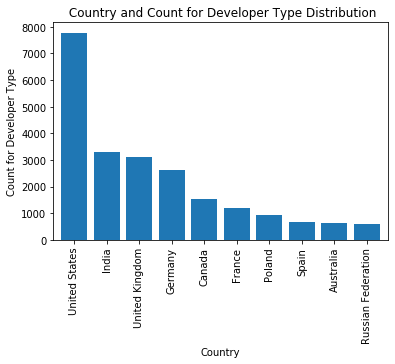

In [108]:
developer = survey1[survey1['Profession']=='D']
ax=developer['Country'].value_counts()[:10].plot.bar(width=0.8)
labels_name('Country' ,'Count for Developer Type' )

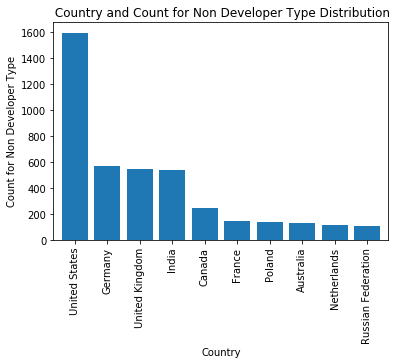

In [109]:
Ndeveloper = survey1[survey1['Profession']=='ND']
g=Ndeveloper['Country'].value_counts()[:10].plot.bar(width=0.8)
labels_name('Country' ,'Count for Non Developer Type' )

## Observation :
- In united state the Non Developer profession is more than the Developer profession .The difference is more than 6000 .
- But in rest all the countries the  Developer profession is very popular .

# Q.5 ) What is the salary difference between both the Profession ?

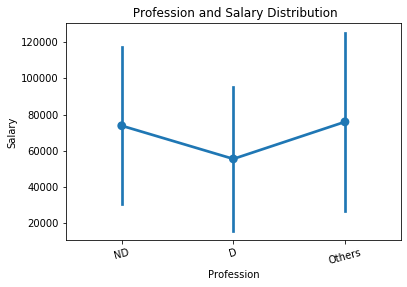

In [110]:
sns.pointplot(data = survey1, y = 'Salary', x = 'Profession' , ci = 'sd');
plt.xticks(rotation = 15);
labels_name('Profession','Salary' )

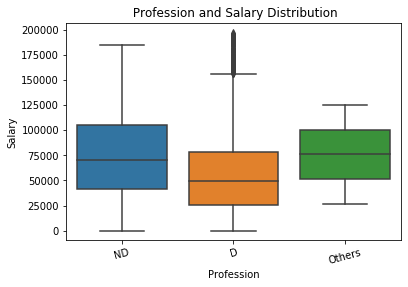

In [111]:
sns.boxplot(data = survey1, y = 'Salary', x = 'Profession');
plt.xticks(rotation = 15);
labels_name('Profession','Salary' )

## Observation :
- the medium salary is highest for Non Developer Profession and Others Profession.
- the IQR is largest of Non Developer proffesion .

# Conclusions:
>  these are the conclusion for the mentioned set of questions . :
- Developers are more satisfied in terms of Job and career .
- Non Developers spent more time searching for jobs throughout the week .
- Developers having more secured job .
- Employment status for both the professions is equally distributed . more than 75% are employed full time .
- In United State Non Developer Profession is trending while in other countries Developers are quite popular .
- Non Developers Community having more salary range , Developers having less salaray range than Non Developers .


## References :

1. https://thispointer.com/python-how-to-use-if-else-elif-in-lambda-functions/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
3. https://stackoverflow.com/questions/53164305/plotting-on-specific-column-values-in-python
4. https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/